<a href="https://colab.research.google.com/github/LAMECH9/LAMECH9/blob/main/SOIN_SOIL_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SOIN SOIL ANALYSIS AND PREDICTION**

# Dataset Overview

 This script performs comprehensive soil data analysis and prediction, focusing on soil properties like pH, nutrients (N, P, K), and classification using machine learning and geospatial techniques.













**PROBLEM**

**Soil health** plays a crucial role in agricultural productivity and environmental sustainability. Farmers and agronomists need accurate data on soil properties like pH, electrical conductivity (EC), organic carbon (C), nitrogen (N), phosphorus (P), and potassium (K) to make informed decisions on fertilizer application, crop selection, and land management.

However, soil analysis faces several challenges:

*  Data inconsistency & missing values – Soil datasets often contain missing, inconsistent, or erroneous entries.
*   Outliers & extreme values – Unusual readings can mislead predictions and analysis.

*  Predicting soil parameters – Farmers lack predictive insights into soil fertility trends.


*   Spatial variability – Soil properties vary across different locations, making mapping essential for targeted recommendations.

*   Lack of advanced analytical tools – Traditional soil analysis methods are time-consuming and expensive.








# **OBJECTIVE**

The primary objective of this project is to develop an AI-powered soil analysis and prediction system that will:


*Clean and preprocess raw soil data to remove inconsistencies and outliers.
*  Perform Exploratory Data Analysis (EDA) to understand correlations and trends.

*  Predict key soil parameters like pH, nitrogen, phosphorus, and potassium using machine learning models.
*  Classify soil into different types based on its chemical composition.

*   Generate geospatial visualizations (heatmaps, clustering) to understand soil distribution.

This will ultimately help in precision agriculture, sustainable soil management, and increasing crop yield while reducing input costs







STEP 1:Importing Required Libraries

The script imports various Python libraries needed for data manipulation, visualization, machine learning, and geospatial analysis.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from folium.plugins import HeatMap
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
import folium
import geopandas as gpd
from pykrige.ok import OrdinaryKriging
from folium import plugins
import lightgbm as Igb
from sklearn.model_selection import KFold
from matplotlib import rcParams
!pip install geopandas
!pip install pykrige


Step 1.1 **Key Libraries and Their Functions**

**Library**	                **Purpose**

**NumPy & Pandas**    	    Data manipulation and numerical operations

**Seaborn & Matplotlib	**     Data visualization (heatmaps, boxplots, trend analysis)

**Folium & GeoPandas	**     Geospatial analysis (mapping soil parameters, heatmaps)

**Scikit-learn **       	Machine learning (regression, classification, clustering)

**Statsmodels**	   Time series analysis (seasonal decomposition, trend analysis)

**PyKrige**  	Kriging interpolation for spatial analysis

**LightGBM** 	Gradient boosting for predictive modeling

**Installing Missing Libraries**
These commands install geopandas and pykrige, which are necessary for geospatial and kriging interpolation tasks.

**Step 2:Loading and Inspecting the Dataset**

In [ ]:
from google.colab import drive
# drive.mount('/content/SOIN.csv')

# Load dataset (Change path based on your file location)
# file_path =
df = pd.read_csv("/content/SOIN.csv")



In [ ]:
# Display first 5 rows
df.head()

,FID,NAME,Y(Long),X(Lat),pH H20,EC mS/Cm,% C,%N,P ppm,K ppm
0,1,S1,-0.346664,35.071544,7.481,0.057,4.3,0.645646,22.373394,880.2907
1,2,S2,-0.339826,35.071742,6.699,0.072,2.6,0.525526,14.361300,1083.9962
2,3,S3,-0.304501,35.077069,6.242,0.155,2.3,0.240240,1.965231,1543.6938
3,4,S4,-0.305109,35.079914,7.512,0.080,2.3,0.495495,25.396825,884.0175
4,5,S5,-0.304497,35.080365,6.189,0.069,1.8,0.300300,3.023432,539.8499


**MEANING OF FEATURES**

*   **FID**: Unique identifier for each soil sample.



*   **NAME**: Sample ID or location name.


*  Y(Long): Longitude coordinate of the sample location.



*   **X(Lat)**: Latitude coordinate of the sample location.
*   **pH H20:** Soil pH measured in water, indicating soil acidity or alkalinity.
*   **EC mS/Cm**: Electrical conductivity (EC) in millisiemens per centimeter (mS/cm), measuring soil salinity.




*   % C: Percentage of carbon in the soil, indicating organic matter content


*   **% N**: Percentage of nitrogen, an essential nutrient for plant growth.




*  P ppm: Phosphorus concentration in parts per million (ppm), important for plant development.




*   K ppm: Potassium concentration in parts per million (ppm), crucial for plant health



In [ ]:
# Display last 5 rows
df.tail()

,FID,NAME,Y(Long),X(Lat),pH H20,EC mS/Cm,% C,%N,P ppm,K ppm
62,63,S63,-0.303972,35.079501,6.066,0.047,1.7,0.257732,4.887735,536.2821
63,64,S64,-0.277033,35.101515,6.582,0.105,2.3,0.498282,3.971285,1107.7908
64,65,S65,-0.296951,35.064343,6.566,0.087,1.8,0.292096,18.329006,674.9576
65,66,S66,-0.282148,35.109261,6.622,0.107,2.6,0.584192,12.219337,645.7183
66,67,S67,-0.279362,35.102892,6.606,0.150,2.2,0.515464,11.455629,932.5087


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FID       67 non-null     int64  
 1   NAME      67 non-null     object 
 2   Y(Long)   67 non-null     float64
 3   X(Lat)    67 non-null     float64
 4   pH H20    67 non-null     float64
 5   EC mS/Cm  67 non-null     float64
 6   % C       67 non-null     float64
 7   %N        67 non-null     float64
 8   P ppm     67 non-null     float64
 9   K ppm     67 non-null     float64
dtypes: float64(8), int64(1), object(1)
memory usage: 5.4+ KB



**Inference**
*   Understand data structure (column names, data types, missing values)


*   Check for consistency (ensure the file is correctly formatted)



*   Identify key soil properties (pH, EC, Carbon, Nitrogen, Phosphorus, Potassium)






# **Step 3:Data preprocessing**

This step ensures data consistency, removes errors, and prepares the dataset for analysis

Step 3.1:Column Renaming

In [ ]:
# Renaming columns for consistency
df.rename(columns={
    'pH H20': 'pH',
    'EC mS/Cm': 'EC',
    '% C': 'C_percent',
    '%N': 'N_percent',
    'P ppm': 'P_ppm',
    'K ppm': 'K_ppm'
}, inplace=True)







*   Renames columns to standardized names for consistency.




Step 3.2:Handling duplicates

In [ ]:
# Check for duplicates
df.drop_duplicates(inplace=True)



*   Removes duplicate records.



Step 3.3 Convert Numerical Columns

In [ ]:
# Convert numerical columns to correct format
df[['pH', 'EC', 'C_percent', 'N_percent', 'P_ppm', 'K_ppm']] = df[['pH', 'EC', 'C_percent', 'N_percent', 'P_ppm', 'K_ppm']].apply(pd.to_numeric, errors='coerce')

# Check summary statistics
df.describe()

,FID,Y(Long),X(Lat),pH,EC,C_percent,N_percent,P_ppm,K_ppm
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,34.000000,-0.312612,35.072736,6.731239,0.182224,2.489552,0.513422,17.070512,828.147369
std,19.485037,0.025880,0.017142,0.574115,0.119990,0.806251,0.261901,20.013939,314.227567
min,1.000000,-0.351335,35.048104,5.517000,0.038000,1.000000,0.075075,0.305483,318.906200
25%,17.500000,-0.341971,35.058371,6.397500,0.103000,1.900000,0.288691,3.283947,615.577300
50%,34.000000,-0.304501,35.071173,6.632000,0.150000,2.300000,0.495495,10.539178,807.992400
75%,50.500000,-0.295144,35.079082,6.818500,0.214000,2.800000,0.645646,22.107729,954.246250
max,67.000000,-0.261324,35.118976,8.925000,0.729000,4.900000,1.254296,99.587597,2076.063200


Ensures that numerical columns are correctly formatted.

Step3.4:Handling Missing Values

In [ ]:
#check for missing values
df.dropna(inplace=True)



*   Removes rows with missing values.




# Step 4: Handling outliers

Outliers can affect predictions, so they are identified and handled.

Step 4.1:Identifying Outliers(IQR Method)

The **Interquartile Range **(IQR) method is used to detect outliers based on the spread of data:

1.   Q1 (First Quartile, 25th Percentile): The value below which 25% of the data falls.



2.   Q3 (Third Quartile, 75th Percentile): The value below which 75% of the data falls.



3.  IQR (Interquartile Range):
𝐼
𝑄
𝑅
=
𝑄
3
−
𝑄
1
IQR=Q3−Q1 represents the spread of the middle 50% of the data.

   4.Lower Bound:
𝑄
1
−
1.5
×
𝐼
𝑄
𝑅
Q1−1.5×IQR (values below this are outliers).


5.Upper Bound:
𝑄
3+1.5
×
𝐼
𝑄
𝑅
Q3+1.5×IQR (values above this are outliers).





In [ ]:
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Example usage:
outliers_pH = find_outliers_iqr(df, 'pH')
print(outliers_pH)

    FID NAME   Y(Long)     X(Lat)     pH     EC  C_percent  N_percent  \
0     1   S1 -0.346664  35.071544  7.481  0.057        4.3   0.645646   
3     4   S4 -0.305109  35.079914  7.512  0.080        2.3   0.495495   
5     6   S6 -0.295349  35.056108  7.978  0.200        2.6   0.525526   
8     9   S9 -0.342972  35.050519  7.452  0.210        3.8   0.585586   
14   15  S15 -0.310320  35.078663  7.870  0.150        2.0   0.195195   
16   17  S17 -0.297092  35.064237  7.728  0.164        1.7   0.075075   
17   18  S18 -0.261324  35.079608  8.112  0.304        4.9   0.945946   
37   38  S38 -0.272938  35.110082  5.737  0.139        2.6   0.601375   
44   45  S45 -0.350979  35.069103  8.925  0.365        3.0   0.773196   
51   52  S52 -0.289893  35.088136  5.517  0.112        1.8   0.481100   
56   57  S57 -0.288899  35.056655  7.522  0.316        3.9   1.202749   

        P_ppm      K_ppm  
0   22.373394   880.2907  
3   25.396825   884.0175  
5    6.953893   949.1242  
8   37.879945  



*  **Outliers in pH H20**
The outliers in soil pH (measured in water) were identified based on the IQR method. These are samples with pH values that are either too high or too low compared to the majority of the dataset.


*   **Lower and Upper Bound for Outliers**

    Any value below the lower bound or above the upper bound is classified as an outlier.

    Some values in the dataset exceed these limits and are flagged as outliers

*   **List of Outlier Samples**

    The following soil samples were found to have extreme pH values:

    **High pH (Alkaline Outliers):** Samples S1, S4, S6, S9, S15, S17, S18, S45, S57 have high pH values (above the upper bound).

    **Low pH (Acidic Outliers)**: Samples S38, S52 have low pH values (below the lower bound
*    **Reasons for Outliers in Soil pH**

     **High pH (Alkaline soil):** May result from high lime (calcium carbonate) content or low organic matter.

     **Low pH (Acidic soil):** Could be due to leaching of basic ions, excessive use of fertilizers, or high organic matter decomposition




Step 4.2:Handling Outliers

In [ ]:
# Remove outliers from 'pH' column
df_no_outliers = df[~df.index.isin(outliers_pH.index)]

In [ ]:
# Replace outliers with median for 'pH'
median_pH = df['pH'].median()
df.loc[df.index.isin(outliers_pH.index), 'pH'] = median_pH

In [ ]:
upper_limit = df['pH'].quantile(0.95) # Example: 95th percentile
df.loc[df['pH'] > upper_limit, 'pH'] = upper_limit

Step 4.3:Box Plot for Soil pH Outliers

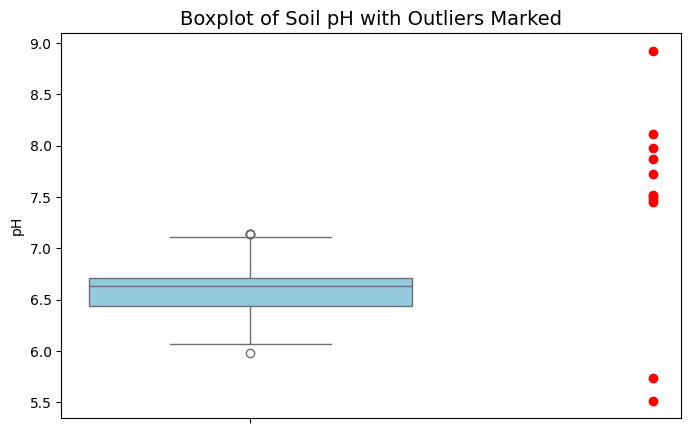

In [ ]:
# Set plot style
plt.figure(figsize=(8, 5))
sns.boxplot(y=df["pH"], color="skyblue")

# Mark outliers in red
for outlier in outliers_pH["pH"]:
    plt.scatter(1, outlier, color="red", zorder=3)

# Labels and title
plt.title("Boxplot of Soil pH with Outliers Marked", fontsize=14)
plt.ylabel("pH")

# Show plot
plt.show()


**Inference**

**Box and Whiskers:**

The box represents the Interquartile Range (IQR) (middle 50% of data).

The whiskers extend to the minimum and maximum values within 1.5 × IQR.

**Outliers (Red Dots):**

The **red dots** represent soil samples with extreme pH values (above or below the whiskers).

These correspond to very acidic (low pH) or very alkaline (high pH) soils in the dataset.

**Interpreting the Distribution:**

If the box is centered: The data is **symmetrical.**

If the box is skewed (longer whiskers on one side): The data has **skewness (asymmetry).**



**Step 4.4:Comparing pH Outliers with Other Soil Properties**

To check whether the pH outliers also show unusual behavior in other soil properties (EC, Carbon (%C), Phosphorus (P ppm)), i will create multiple box plots.

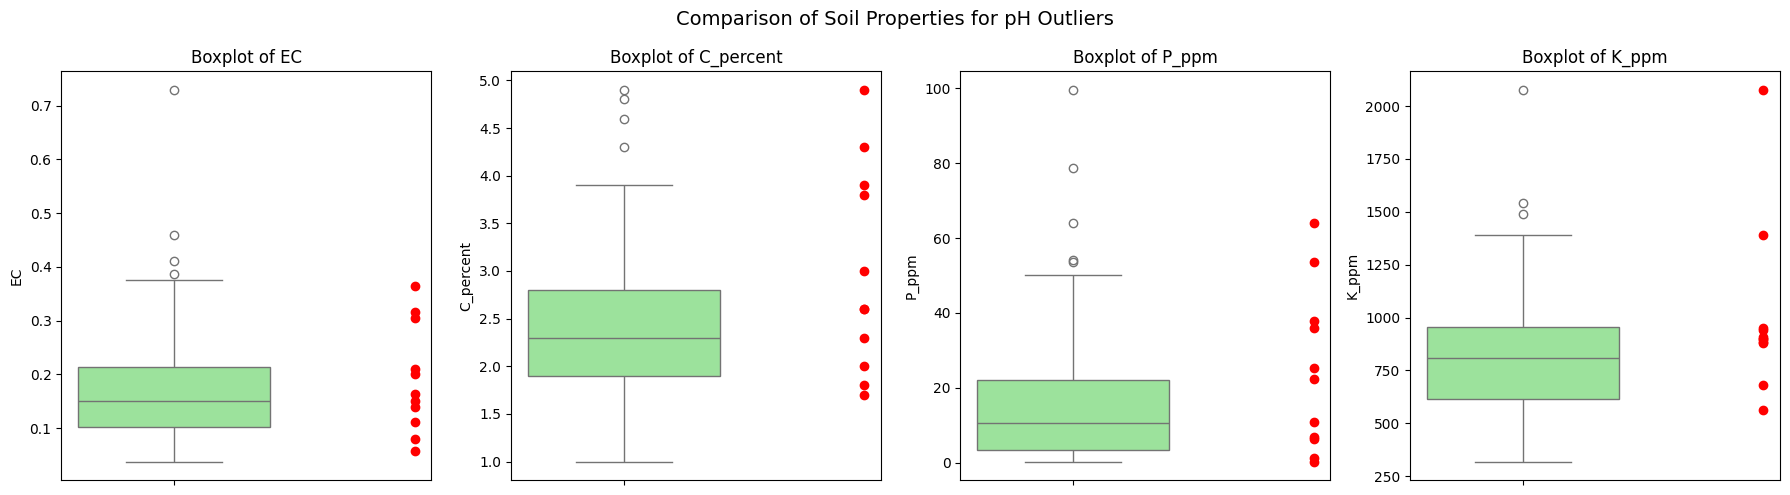

In [ ]:
# List of soil properties to compare with pH outliers
features = ["EC", "C_percent", "P_ppm", "K_ppm"]
num_features = len(features)

# Create subplots for each feature
fig, axes = plt.subplots(1, num_features, figsize=(18, 5))

for i, feature in enumerate(features):
    sns.boxplot(y=df[feature], color="lightgreen", ax=axes[i])

    # Mark outliers in red
    for outlier in outliers_pH[feature]:
        axes[i].scatter(1, outlier, color="red", zorder=3)

    axes[i].set_title(f"Boxplot of {feature}", fontsize=12)
    axes[i].set_ylabel(feature)

plt.suptitle("Comparison of Soil Properties for pH Outliers", fontsize=14)
plt.tight_layout()
plt.show()


**Inferences**


**Box Plots for EC, Carbon (%C), Phosphorus (P ppm), and Potassium (K ppm**)

   These plots visualize the **spread of data** and highlight the **outliers.**

  **Red dots** represent the pH outliers in each property.

 **Observations:**

  If **pH outliers also appear as outliers in EC, %C, P ppm, or K ppm**, it suggests a **strong correlation.**

  If **pH outliers are within normal range** for other properties, it means they are **isolated anomalies.**

### **Step 5: Exploratory Data Analysis (EDA)**

Step 5.1 Correlation heatmap

**1.Color Coding (cmap="coolwarm")**

*   **Red (Closer to 1)**: Strong positive correlation (when one variable increases, the other increases).
*   **Blue (Closer to -1)**: Strong negative correlation (when one variable increases, the other decreases).

*   **White/Gray (~0)**: No correlation (random relationship).

**2.Correlation Values (annot=True, fmt=".2f")**

*   Each cell in the heatmap contains a **correlation coefficient **between two soil properties


*   **1.00** (Perfect positive correlation, diagonal elements).
*   -1.00 (Perfect negative correlation).

*   **0.00** (No correlation).












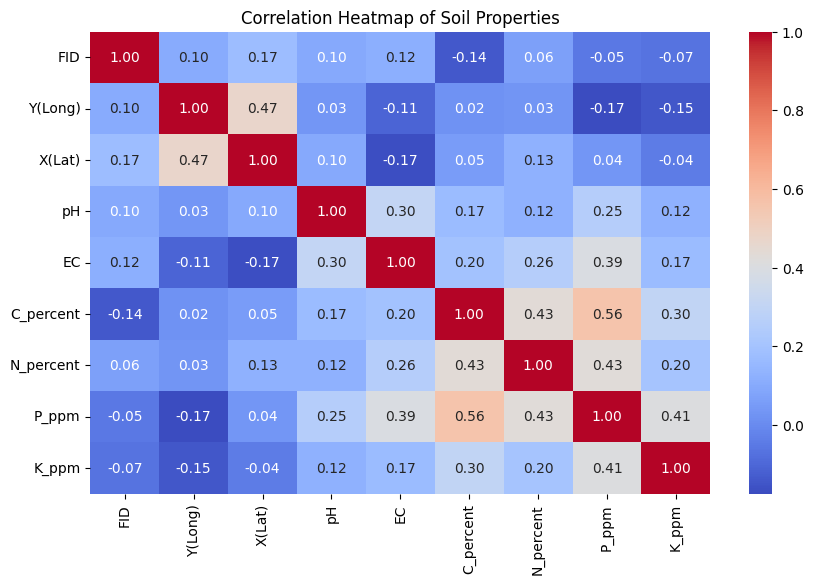

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
# Select only numerical columns for correlation
numerical_cols = df.select_dtypes(include=np.number).columns
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Soil Properties")
plt.show()

1.**pH vs. EC (Electrical Conductivity):**

 A negative correlation indicate that as **pH increases, salinity decreases, which is common in acidic soils.**

**2.pH vs. Carbon (%C**):

 If **positively** correlated, soils with more organic matter tend to be less **acidic.**

**3.pH vs. Phosphorus (P ppm):**

 A **strong correlation** suggest that **phosphorus** availability depends on soil pH levels

**4.pH vs. Potassium (K ppm):**

 If **correlated**, it  indicate how soil pH affects **potassium retention and availability.**



# **Step 6: Feature Engineering**

Step 6.1:Log Transformation (for skewed features)


In [ ]:

# Log transformation for skewed features
df["log_P_ppm"] = np.log1p(df["P_ppm"])
df["log_K_ppm"] = np.log1p(df["K_ppm"])



Reduces the effect of highly skewed distributions.

Step 6.2 Normalization (Min-Max Scaling)

In [ ]:
# Normalization (Min-Max Scaling)
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[["pH", "EC", "C_percent", "N_percent", "log_P_ppm", "log_K_ppm"]] = scaler.fit_transform(df_scaled[["pH", "EC", "C_percent", "N_percent", "log_P_ppm", "log_K_ppm"]])

df_scaled.head()

,FID,NAME,Y(Long),X(Lat),pH,EC,C_percent,N_percent,P_ppm,K_ppm,log_P_ppm,log_K_ppm
0,1,S1,-0.346664,35.071544,0.562942,0.027496,0.846154,0.483854,22.373394,880.2907,0.664071,0.541706
1,2,S2,-0.339826,35.071742,0.620791,0.049204,0.410256,0.381990,14.361300,1083.9962,0.567454,0.652865
2,3,S3,-0.304501,35.077069,0.226213,0.169320,0.333333,0.140063,1.965231,1543.6938,0.188834,0.841700
3,4,S4,-0.305109,35.079914,0.562942,0.060781,0.333333,0.356524,25.396825,884.0175,0.692071,0.543962
4,5,S5,-0.304497,35.080365,0.180452,0.044863,0.205128,0.190995,3.023432,539.8499,0.259080,0.280707


Scales data between 0 and 1.

# **Step 7 :Time Series Analysis**

Seasonal Decomposition – Breaking down the data into trend, seasonality, and residual components.

Trend Analysis – Identifying long-term changes in the soil parameters.



Preparing Time Series Data

In [ ]:
# Check if 'Date' column exists before processing
if 'Date' not in df.columns:
    # If not present, assume it's the index and reset it to a column
    df.reset_index(inplace=True)
    #Rename the column appropriately.  It might be named 'index'
    df.rename(columns={'index':'Date'}, inplace=True)

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop missing dates if any were generated during conversion
df = df.dropna(subset=['Date'])

# Set 'Date' as index
df.set_index('Date', inplace=True)

# Sort data by date
df = df.sort_index()

df.head()

,FID,NAME,Y(Long),X(Lat),pH,EC,C_percent,N_percent,P_ppm,K_ppm,log_P_ppm,log_K_ppm
Date,,,,,,,,,,,,
1970-01-01 00:00:00.000000000,1,S1,-0.346664,35.071544,6.632,0.057,4.3,0.645646,22.373394,880.2907,3.151598,6.781388
1970-01-01 00:00:00.000000001,2,S2,-0.339826,35.071742,6.699,0.072,2.6,0.525526,14.361300,1083.9962,2.731851,6.989332
1970-01-01 00:00:00.000000002,3,S3,-0.304501,35.077069,6.242,0.155,2.3,0.240240,1.965231,1543.6938,1.086955,7.342581
1970-01-01 00:00:00.000000003,4,S4,-0.305109,35.079914,6.632,0.080,2.3,0.495495,25.396825,884.0175,3.273244,6.785607
1970-01-01 00:00:00.000000004,5,S5,-0.304497,35.080365,6.189,0.069,1.8,0.300300,3.023432,539.8499,1.392135,6.293142


Seasonal Decomposition of Soil pH

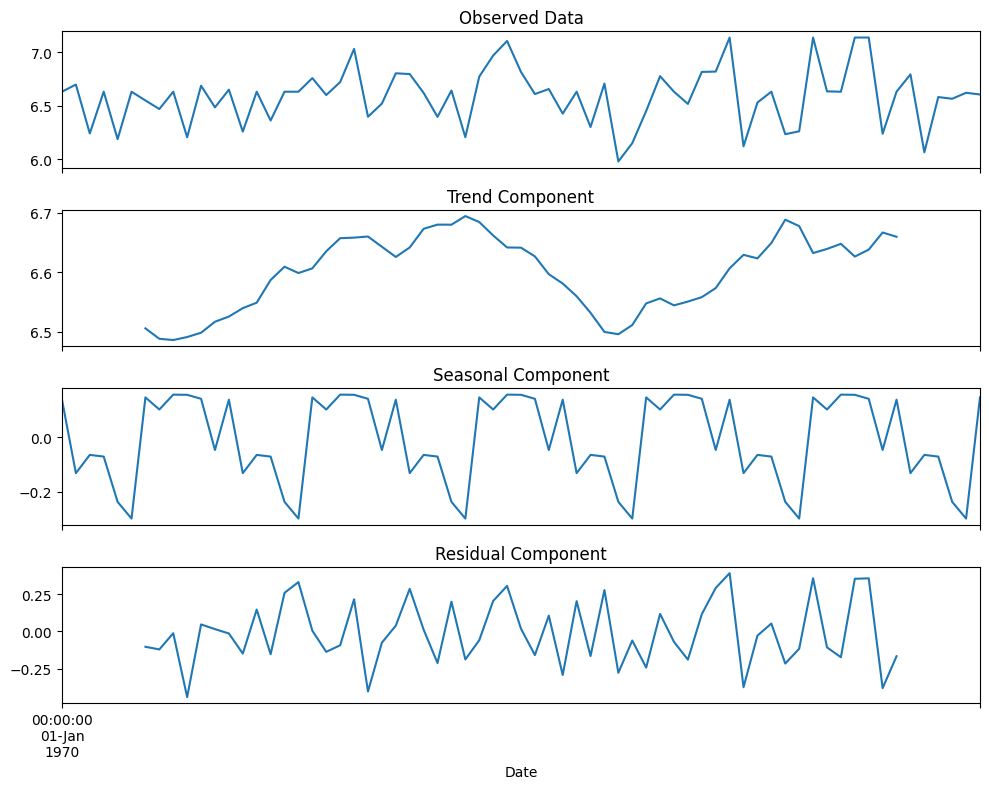

In [ ]:
# Perform seasonal decomposition (modify column based on your interest, e.g., 'pH')
result = seasonal_decompose(df['pH'], model='additive', period=12)

# Plot decomposition
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
result.observed.plot(ax=axes[0], legend=False, title='Observed Data')
result.trend.plot(ax=axes[1], legend=False, title='Trend Component')
result.seasonal.plot(ax=axes[2], legend=False, title='Seasonal Component')
result.resid.plot(ax=axes[3], legend=False, title='Residual Component')

plt.tight_layout()
plt.show()

Trend Analysis of Soil pH Over Time

<ipython-input-21-e0e3aa6bef48>:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_resampled = df['pH'].resample('Y').mean()


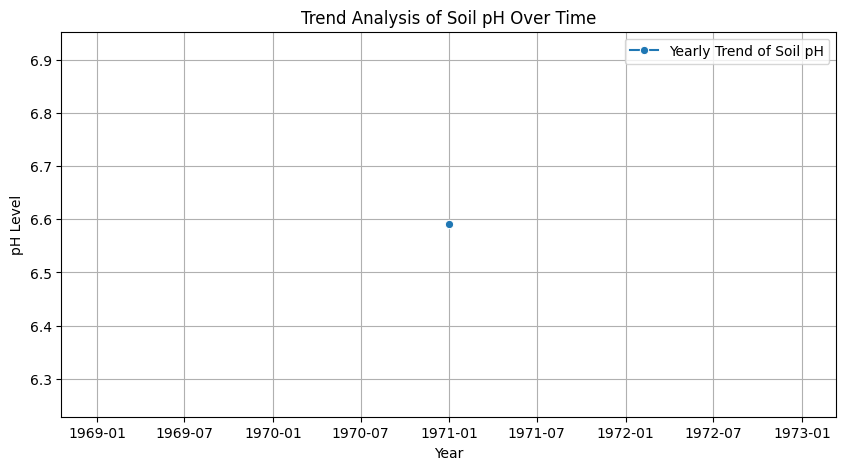

In [ ]:
# Resampling data by year for trend visualization
df_resampled = df['pH'].resample('Y').mean()

plt.figure(figsize=(10,5))
sns.lineplot(x=df_resampled.index, y=df_resampled.values, marker="o", linestyle="-", label="Yearly Trend of Soil pH")
plt.title("Trend Analysis of Soil pH Over Time")
plt.xlabel("Year")
plt.ylabel("pH Level")
plt.grid(True)
plt.show()

 Conclusion

 Seasonal Decomposition shows how pH levels fluctuate over time.

Trend Analysis reveals whether soil conditions are improving or degrading.

# **Step 8:Predictive Modeling**

Step 8.1 Predicting Soil pH Levels

In [ ]:

# Select features and target
X = df_scaled[["EC", "C_percent", "N_percent", "log_P_ppm", "log_K_ppm"]]
y = df_scaled["pH"]





In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [ ]:
# Predictions
y_pred = model.predict(X_test)



Step 8.2:Predicting Soil Nutrient Levels (N, P, K)

In [ ]:
# Predicting Nitrogen (N_percent)
X_n = df_scaled[["pH", "EC", "C_percent", "log_P_ppm", "log_K_ppm"]]
y_n = df_scaled["N_percent"]
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_n, y_n, test_size=0.2, random_state=42)
model_n = RandomForestRegressor(n_estimators=100, random_state=42)
model_n.fit(X_train_n, y_train_n)
y_pred_n = model_n.predict(X_test_n)
print("MAE for Nitrogen Prediction:", mean_absolute_error(y_test_n, y_pred_n))

MAE for Nitrogen Prediction: 0.179273993861266


In [ ]:
# Predicting Phosphorus (P_percent)
X_p = df_scaled[["pH", "EC", "C_percent", "log_P_ppm", "log_K_ppm"]]
y_p = df_scaled["log_P_ppm"]
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_p, y_p, test_size=0.2, random_state=42)
model_p = RandomForestRegressor(n_estimators=100, random_state=42)
model_p.fit(X_train_p, y_train_p)
y_pred_p = model_p.predict(X_test_p)
print("MAE for Phosphorus Prediction:", mean_absolute_error(y_test_p, y_pred_p))

MAE for Phosphorus Prediction: 0.011795261399283328


In [ ]:
# Predicting Potassium(K_percent)
X_k = df_scaled[["pH", "EC", "C_percent", "log_P_ppm", "log_K_ppm"]]
y_k = df_scaled["log_K_ppm"]
X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(X_k, y_k, test_size=0.2, random_state=42)
model_k = RandomForestRegressor(n_estimators=100, random_state=42)
model_k.fit(X_train_k, y_train_k)
y_pred_k = model_k.predict(X_test_k)
print("MAE for Potassium Prediction:", mean_absolute_error(y_test_k, y_pred_k))

MAE for Potassium Prediction: 0.013526334766543396


# **Step 9:Soil Classification (K-Means Clustering**)

In [ ]:

# Using 3 clusters (adjust as needed)
kmeans = KMeans(n_clusters=3, random_state=42)
df_scaled["Soil_Type"] = kmeans.fit_predict(df_scaled[["pH", "EC", "C_percent", "N_percent", "log_P_ppm", "log_K_ppm"]])



In [ ]:
# Count of each soil type
df_scaled["Soil_Type"].value_counts()

,count
Soil_Type,
2,31
0,22
1,14


Clusters soil types into 3 groups.

Step 9.2 Identifying Ideal Soil Conditions for Crops

In [ ]:

# Assuming 'Crop_Suitability' column exists with labels (e.g., "Wheat", "Maize", "Rice")
# If not, create a categorical variable based on pH and nutrients.
df_scaled["Crop_Suitability"] = pd.cut(df_scaled["pH"], bins=[0, 5.5, 7.5, 14], labels=["Acidic", "Neutral", "Alkaline"])

X_crop = df_scaled[["EC", "C_percent", "N_percent", "log_P_ppm", "log_K_ppm"]]
y_crop = df_scaled["Crop_Suitability"]

X_train_crop, X_test_crop, y_train_crop, y_test_crop = train_test_split(X_crop, y_crop, test_size=0.2, random_state=42)

# Train classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_crop, y_train_crop)

# Predictions
y_pred_crop = clf.predict(X_test_crop)



In [ ]:
# Accuracy
# Convert y_pred_crop and y_test_crop to a common data type, for example, string
y_pred_crop = y_pred_crop.astype(str)
y_test_crop = y_test_crop.astype(str)
print("Crop Suitability Classification Accuracy:", accuracy_score(y_test_crop, y_pred_crop))

Crop Suitability Classification Accuracy: 0.9285714285714286


 Inference

This model predicts pH levels, soil nutrients, and classifies soil types.

It also identifies ideal soil conditions for crops.

# **Step 10:Geospatial Analysis**

In [ ]:
# Assuming your DataFrame has 'Latitude' and 'Longitude' columns
# If not, replace with your actual column names
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Y(Long)'], df['X(Lat)']))






In [ ]:

#Mapping Soil Parameters
# Create a base map
m = folium.Map(location=[gdf['X(Lat)'].mean(), gdf['Y(Long)'].mean()], zoom_start=10)



In [ ]:
# Add markers for pH values
for idx, row in gdf.iterrows():
    folium.CircleMarker(
        location=[row['X(Lat)'], row['Y(Long)']],
        radius=5,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"pH: {row.pH:.2f}"  # Display pH value in popup
    ).add_to(m)

# Display the map




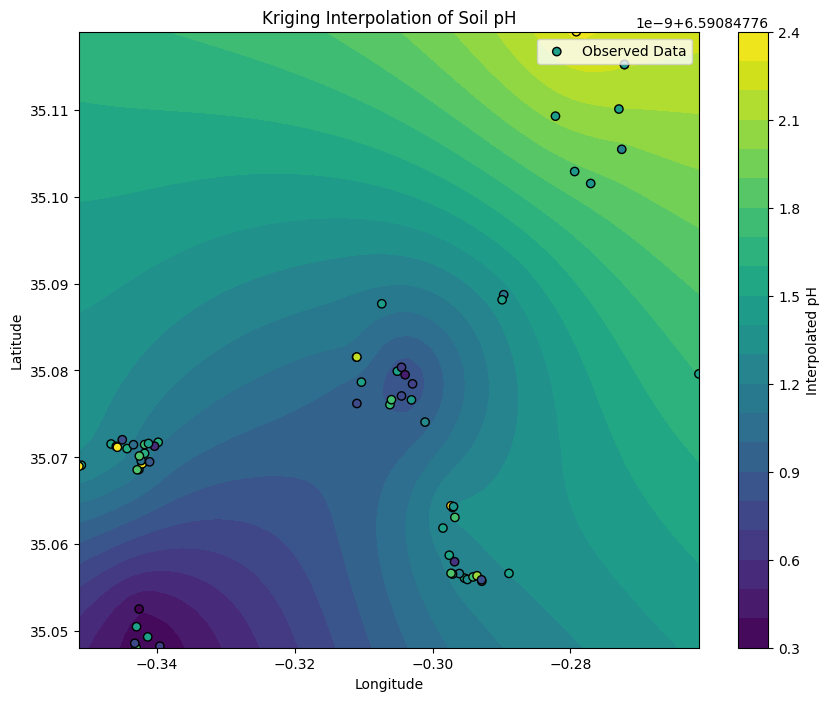

In [ ]:
# %% [markdown]
# ### Spatial Interpolation (Kriging)

# %%
# Prepare data for Kriging
coords = gdf[['X(Lat)', 'Y(Long)']].values
values = gdf['pH'].values  # Interpolate pH values

# Create Kriging model
OK = OrdinaryKriging(
    coords[:, 1], coords[:, 0], values,
    variogram_model='linear',  # You can experiment with different models
    verbose=False, enable_plotting=False
)

# Define grid for interpolation
grid_lon = np.linspace(gdf['Y(Long)'].min(), gdf['Y(Long)'].max(), 50)
grid_lat = np.linspace(gdf['X(Lat)'].min(), gdf['X(Lat)'].max(), 50)

# Perform interpolation
z, ss = OK.execute('grid', grid_lon, grid_lat)

# %% [markdown]
# ### Visualize Interpolated Data

# %%
# Create a contour plot
plt.figure(figsize=(10, 8))
contour = plt.contourf(grid_lon, grid_lat, z, levels=20, cmap='viridis')
plt.colorbar(contour, label='Interpolated pH')
plt.scatter(coords[:, 1], coords[:, 0], c=values, marker='o', edgecolors='k', label='Observed Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Kriging Interpolation of Soil pH')
plt.legend()
plt.show()



In [ ]:
# %% [markdown]
# ### Geospatial Predictions (Machine Learning)

# %%
# Prepare features and target for prediction
# Assuming 'Latitude' and 'Longitude' are your spatial features
X_geo = gdf[['X(Lat)', 'Y(Long)']]
y_geo = gdf['pH']  # Predict pH based on location

# Split data
X_train_geo, X_test_geo, y_train_geo, y_test_geo = train_test_split(
    X_geo, y_geo, test_size=0.2, random_state=42
)

# Train a model (e.g., RandomForestRegressor)
model_geo = RandomForestRegressor(n_estimators=100, random_state=42)
model_geo.fit(X_train_geo, y_train_geo)

# Make predictions
y_pred_geo = model_geo.predict(X_test_geo)

# Evaluate the model
mae_geo = mean_absolute_error(y_test_geo, y_pred_geo)
print(f"MAE for Geospatial Prediction: {mae_geo}")

# %% [markdown]


MAE for Geospatial Prediction: 0.21728714285714115


 **Inference**
 This extended analysis includes **geospatial analysis** for mapping, interpolation, and prediction of soil properties.

 It provides a more comprehensive understanding of **soil variability** and its relationship with location.

In [ ]:
soin_df = pd.read_csv('/content/SOIN.csv')

In [ ]:
soin_df = pd.read_csv('/content/SOIN.csv')

# Assuming 'X(Lat)' and 'Y(Long)' are your latitude and longitude columns
soin_loc = [[float(soin_df['X(Lat)'].values[i]), float(soin_df['Y(Long)'].values[i])] for i in range(len(soin_df))]

# Create a Folium map object
heatmap = folium.Map(location=[soin_df['X(Lat)'].mean(), soin_df['Y(Long)'].mean()], zoom_start=10)

heatmap.add_child(HeatMap(soin_loc, radius=10))
for index, row in soin_df.iterrows():
    folium.Marker([float(row['X(Lat)']), float(row['Y(Long)'])], popup=row['NAME']).add_to(heatmap) #Assuming you want to use the 'NAME' column for the popup

# Display the heatmap
heatmap

In [ ]:
print(soin_df.columns)

Index(['FID', 'NAME', 'Y(Long)', 'X(Lat)', 'pH H20', 'EC mS/Cm', '% C', '%N',
       'P ppm', 'K ppm'],
      dtype='object')


In [ ]:
ave_X = soin_df['X(Lat)'].median()
ave_Y = soin_df['Y(Long)'].median()
directions_map = folium.Map(location=[ave_X, ave_Y], zoom_start=15)


In [ ]:
for index,row in soin_df.iterrows():
    points = []
    points.append(tuple([row['X(Lat)'],row['Y(Long)']]))
    points.append(tuple([row['X(Lat)'],row['Y(Long)']]))
    folium.PolyLine(points,color='red',weight=row['%N']/1000).add_to(directions_map)

In [ ]:
for index,row in soin_df.iterrows():
    folium.Marker([float(row['X(Lat)']),float(row['Y(Long)'])],popup=row['NAME']).add_to(directions_map)

In [ ]:
directions_map

# **Step 11:Recommendation Analysis**

The recommendation system will suggest optimal soil management practices based on the soil properties. We will analyze key parameters such as pH, nitrogen (N), phosphorus (P), potassium (K), organic carbon (OC), and electrical conductivity (EC) to provide targeted recommendations.


In [ ]:
# Function to classify soil pH levels
def classify_pH(pH):
    if pH < 5.5:
        return "Strongly Acidic - Apply Lime"
    elif 5.5 <= pH < 6.5:
        return "Moderately Acidic - Apply Organic Matter"
    elif 6.5 <= pH < 7.5:
        return "Neutral - Ideal for Most Crops"
    else:
        return "Alkaline - Use Sulfur or Gypsum"

In [ ]:
# Function to recommend nitrogen fertilizers
def nitrogen_recommendation(N):
    if N < 20:
        return "Low Nitrogen - Apply Urea or Ammonium Sulfate"
    elif 20 <= N < 50:
        return "Moderate Nitrogen - Use Balanced NPK Fertilizer"
    else:
        return "Sufficient Nitrogen - Maintain Organic Matter"

In [ ]:
# Function to recommend phosphorus fertilizers
def phosphorus_recommendation(P):
    if P < 10:
        return "Low Phosphorus - Apply DAP or Rock Phosphate"
    elif 10 <= P < 30:
        return "Moderate Phosphorus - Use Organic Compost"
    else:
        return "Sufficient Phosphorus - No Additional P Needed"

In [ ]:
# Function to recommend potassium fertilizers
def potassium_recommendation(K):
    if K < 50:
        return "Low Potassium - Apply Potash or KCl Fertilizer"
    elif 50 <= K < 150:
        return "Moderate Potassium - Use Manure or Potassium Sulfate"
    else:
        return "Sufficient Potassium - No Additional K Needed"

In [ ]:
# Apply recommendation functions to the dataset
df['pH Recommendation'] = df['pH'].apply(classify_pH)
df['Nitrogen Recommendation'] = df['N_percent'].apply(nitrogen_recommendation)
df['Phosphorus Recommendation'] = df['P_ppm'].apply(phosphorus_recommendation)
df['Potassium Recommendation'] = df['K_ppm'].apply(potassium_recommendation)

# Display final dataset with recommendations
print(df[['pH', 'pH Recommendation', 'N_percent', 'Nitrogen Recommendation', 'P_ppm', 'Phosphorus Recommendation', 'K_ppm', 'Potassium Recommendation']].head())

                                  pH  \
Date                                   
1970-01-01 00:00:00.000000000  6.632   
1970-01-01 00:00:00.000000001  6.699   
1970-01-01 00:00:00.000000002  6.242   
1970-01-01 00:00:00.000000003  6.632   
1970-01-01 00:00:00.000000004  6.189   

                                                      pH Recommendation  \
Date                                                                      
1970-01-01 00:00:00.000000000            Neutral - Ideal for Most Crops   
1970-01-01 00:00:00.000000001            Neutral - Ideal for Most Crops   
1970-01-01 00:00:00.000000002  Moderately Acidic - Apply Organic Matter   
1970-01-01 00:00:00.000000003            Neutral - Ideal for Most Crops   
1970-01-01 00:00:00.000000004  Moderately Acidic - Apply Organic Matter   

                               N_percent  \
Date                                       
1970-01-01 00:00:00.000000000   0.645646   
1970-01-01 00:00:00.000000001   0.525526   
1970-01-01 00:00:

**Inference**

**pH**: Suggests liming for acidic soils and sulfur/gypsum for alkaline soils.

**Nitrogen (N)**: If low, recommends applying urea or ammonium sulfate.

**Phosphorus (P)**: Suggests applying DAP for deficiency or maintaining organic compost.

**Potassium (K)**: Recommends potash or manure for low levels.